In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import cv2


import os

2024-05-03 19:54:00.892483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 19:54:00.892583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 19:54:01.025028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = ("/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training")
test_path = ("/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test")

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255.0,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100, 100),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (100, 100),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [5]:
len(train_set)

1058

In [6]:
len(test_set)

355

In [7]:
num_classes = len(train_set.class_indices)
print("Number of Classes:", num_classes)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Number of Classes: 131
{0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado', 15: 'Avocado ripe', 16: 'Banana', 17: 'Banana Lady Finger', 18: 'Banana Red', 19: 'Beetroot', 20: 'Blueberry', 21: 'Cactus fruit', 22: 'Cantaloupe 1', 23: 'Cantaloupe 2', 24: 'Carambula', 25: 'Cauliflower', 26: 'Cherry 1', 27: 'Cherry 2', 28: 'Cherry Rainier', 29: 'Cherry Wax Black', 30: 'Cherry Wax Red', 31: 'Cherry Wax Yellow', 32: 'Chestnut', 33: 'Clementine', 34: 'Cocos', 35: 'Corn', 36: 'Corn Husk', 37: 'Cucumber Ripe', 38: 'Cucumber Ripe 2', 39: 'Dates', 40: 'Eggplant', 41: 'Fig', 42: 'Ginger Root', 43: 'Granadilla', 44: 'Grape Blue', 45: 'Grape Pink', 46: 'Grape White', 47: 'Grape White 2', 48: 'Grape White 3', 49: 'Grape White 4', 50: 'Grape

# **CNN Model**

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=(100,100,3), activation="relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3,3), padding="same", activation="relu" ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(Conv2D(64, (3,3), padding="same", activation="relu" ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(Conv2D(128, (3,3), padding="same", activation="relu" ))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
#model.add(Dense(1024, activation="relu"))
#model.add(Dropout(0.4))
model.add(Dense(131, activation="softmax"))

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 100, 100, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 50, 50, 64)        2

In [9]:
# nu_data = train_set.n
# batch_size = train_set.batch_size
# print(no_data)
# print(batch_size)

In [10]:
history = model.fit(train_set,
                    steps_per_epoch = 50,
                    epochs = 30,
                    validation_data = test_set,
                    validation_steps = 200)

Epoch 1/30


2024-05-03 19:54:20.129380: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1714766063.178909     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 [==============================] - 93s 2s/step - loss: 7.7977 - accuracy: 0.1497 - val_loss: 8.5835 - val_accuracy: 0.0070
Epoch 2/30
50/50 [==============================] - 59s 1s/step - loss: 2.5639 - accuracy: 0.3284 - val_loss: 11.7637 - val_accuracy: 0.0248
Epoch 3/30
50/50 [==============================] - 44s 898ms/step - loss: 1.9587 - accuracy: 0.4659 - val_loss: 14.5038 - val_accuracy: 0.0120
Epoch 4/30
50/50 [==============================] - 39s 787ms/step - loss: 1.6140 - accuracy: 0.5434 - val_loss: 12.9474 - val_accuracy: 0.0162
Epoch 5/30
50/50 [==============================] - 35s 711ms/step - loss: 1.3447 - accuracy: 0.6225 - val_loss: 11.0947 - val_accuracy: 0.0575
Epoch 6/30
50/50 [==============================] - 35s 713ms/step - loss: 1.1662 - accuracy: 0.6609 - val_loss: 10.8378 - val_accuracy: 0.0489
Epoch 7/30
50/50 [==============================] - 34s 679ms/step - loss: 1.0806 - accuracy: 0.6891 - val_loss: 8.5564 - val_accuracy: 0.0620
Epoch 8/30


In [11]:
print(history.history)

{'loss': [7.797706127166748, 2.5638558864593506, 1.9586926698684692, 1.6140341758728027, 1.344668984413147, 1.1661735773086548, 1.080566644668579, 0.9990732669830322, 0.8289912939071655, 0.8238726258277893, 0.7827696800231934, 0.724884033203125, 0.7009701728820801, 0.6233252882957458, 0.5792617797851562, 0.6375889778137207, 0.5803887248039246, 0.5639436841011047, 0.5341418981552124, 0.4898665249347687, 0.5226958394050598, 0.471286416053772, 0.4520108699798584, 0.41208863258361816, 0.41179516911506653, 0.4089389145374298, 0.4011492133140564, 0.3866023123264313, 0.37265872955322266, 0.3464783728122711], 'accuracy': [0.1496874988079071, 0.3284375071525574, 0.4659374952316284, 0.5434374809265137, 0.6225000023841858, 0.660937488079071, 0.6890624761581421, 0.7159374952316284, 0.746874988079071, 0.7574999928474426, 0.7718750238418579, 0.7850000262260437, 0.796226441860199, 0.8190624713897705, 0.8271874785423279, 0.8149999976158142, 0.8283019065856934, 0.8296874761581421, 0.84375, 0.8537499904

In [12]:
score = model.evaluate(test_set, batch_size=128, verbose=1)
print("\nTest result: %.3f loss: %3f" % (score[1]*100, score[0]))

355/355 [==============================] - 27s 77ms/step - loss: 0.6135 - accuracy: 0.8620

Test result: 86.200 loss: 0.613496


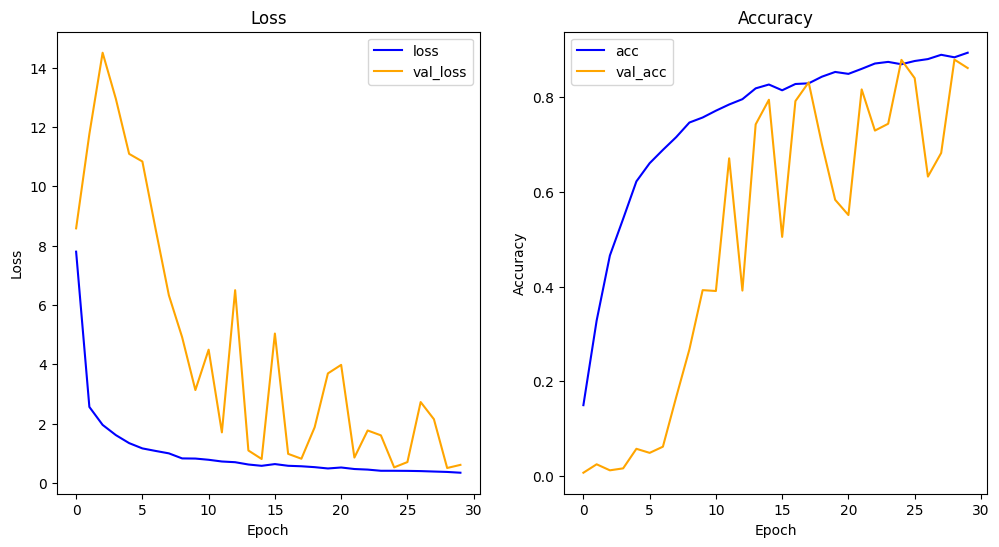

In [13]:
# Plot loss per iteration

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss', color="blue")
plt.plot(history.history['val_loss'], label='val_loss', color="orange")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per iteration

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='acc', color="blue")
plt.plot(history.history['val_accuracy'], label='val_acc', color="orange")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

2/2 [==============================] - 0s 5ms/step


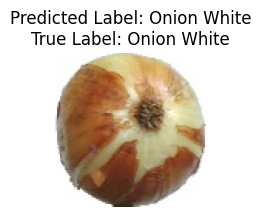

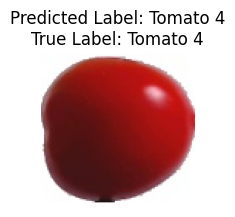

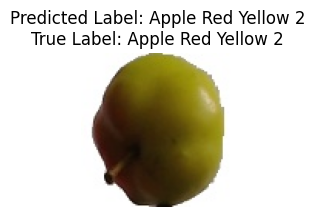

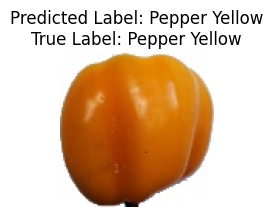

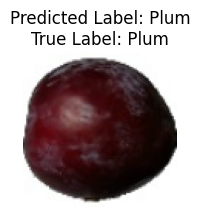

In [14]:
test_images, test_labels = next(test_set)
predictions = model.predict(test_images)

for i in range(5):
    predicted_label_index = np.argmax(predictions[i])
    predicted_label = labels[predicted_label_index]
    true_label_index = np.argmax(test_labels[i])
    true_label = labels[true_label_index]
    
    # Show image
    plt.figure(figsize=(2,2))
    plt.imshow(test_images[i])
    plt.title(f"Predicted Label: {predicted_label}\nTrue Label: {true_label}")
    plt.axis('off')
    plt.show()

# **VGG16 Model**

In [15]:
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_vgg = gen.flow_from_directory(train_path,
                                     target_size = (100, 100),
                                     batch_size = 64,
                                     class_mode = 'categorical')

test_vgg = gen.flow_from_directory(test_path, 
                                   target_size = (100, 100), 
                                   batch_size = 64,
                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [16]:
vgg_model = VGG16(weights="imagenet" ,include_top=False, input_shape=(100,100,3))
vgg_model.trainable = False

for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.output_shape)

58889256/58889256 [==============================] - 0s 0us/step
0 input_1 [(None, 100, 100, 3)]
1 block1_conv1 (None, 100, 100, 64)
2 block1_conv2 (None, 100, 100, 64)
3 block1_pool (None, 50, 50, 64)
4 block2_conv1 (None, 50, 50, 128)
5 block2_conv2 (None, 50, 50, 128)
6 block2_pool (None, 25, 25, 128)
7 block3_conv1 (None, 25, 25, 256)
8 block3_conv2 (None, 25, 25, 256)
9 block3_conv3 (None, 25, 25, 256)
10 block3_pool (None, 12, 12, 256)
11 block4_conv1 (None, 12, 12, 512)
12 block4_conv2 (None, 12, 12, 512)
13 block4_conv3 (None, 12, 12, 512)
14 block4_pool (None, 6, 6, 512)
15 block5_conv1 (None, 6, 6, 512)
16 block5_conv2 (None, 6, 6, 512)
17 block5_conv3 (None, 6, 6, 512)
18 block5_pool (None, 3, 3, 512)


In [17]:
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(131, activation='softmax')(x)

In [18]:
vgg = Model(inputs=vgg_model.input, outputs=output)

# for layer in vgg_model.layers:
#     layer.trainable = False

In [19]:
vgg.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
vgg_history = vgg.fit(
    train_vgg,
    steps_per_epoch=30,
    epochs=30,
    validation_data=test_vgg,
    validation_steps=200)


test_loss, test_acc = vgg.evaluate(test_set, batch_size=64, verbose=1)
print('Test accuracy:', test_acc)

Epoch 1/30
30/30 [==============================] - 27s 812ms/step - loss: 19.3121 - accuracy: 0.2057 - val_loss: 3.4625 - val_accuracy: 0.3473
Epoch 2/30
30/30 [==============================] - 22s 756ms/step - loss: 3.7359 - accuracy: 0.3578 - val_loss: 2.3939 - val_accuracy: 0.5072
Epoch 3/30
30/30 [==============================] - 22s 768ms/step - loss: 3.0803 - accuracy: 0.4458 - val_loss: 1.9548 - val_accuracy: 0.6052
Epoch 4/30
30/30 [==============================] - 21s 700ms/step - loss: 2.4627 - accuracy: 0.5417 - val_loss: 1.7389 - val_accuracy: 0.6618
Epoch 5/30
30/30 [==============================] - 20s 690ms/step - loss: 2.2272 - accuracy: 0.5896 - val_loss: 1.2960 - val_accuracy: 0.7462
Epoch 6/30
30/30 [==============================] - 21s 720ms/step - loss: 1.9928 - accuracy: 0.6391 - val_loss: 1.1356 - val_accuracy: 0.7579
Epoch 7/30
30/30 [==============================] - 20s 693ms/step - loss: 1.7176 - accuracy: 0.6698 - val_loss: 1.0422 - val_accuracy: 0.801

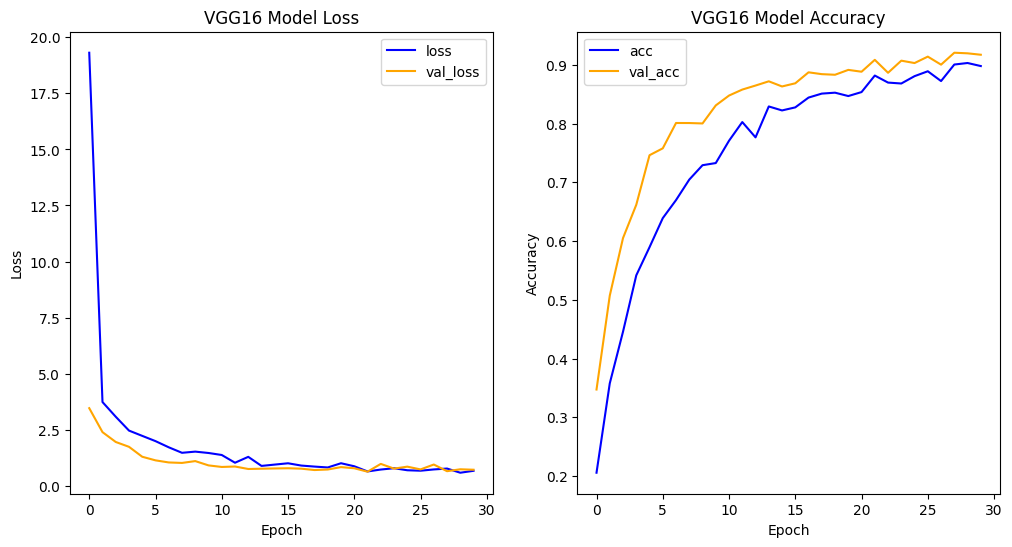

In [21]:
# Plot loss per iteration for VGG

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(vgg_history.history['loss'], label='loss', color="blue")
plt.plot(vgg_history.history['val_loss'], label='val_loss', color="orange")
plt.title('VGG16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy per iteration for VGG

plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['accuracy'], label='acc', color="blue")
plt.plot(vgg_history.history['val_accuracy'], label='val_acc', color="orange")
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()